In [4]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [5]:
arr=imread('images/bird.jpg')

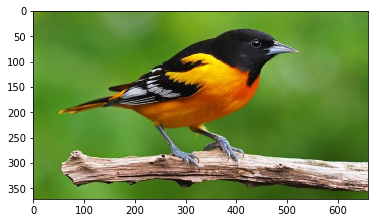

In [6]:
imshow(arr)

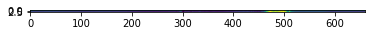

In [7]:
imshow(arr[75,:,:].T)
ax=gca()

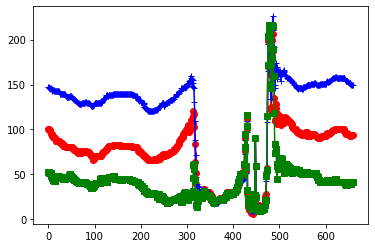

In [8]:
row=65
red,blue,green=arr[row,:,0],arr[row,:,1],arr[row,:,2]
plot(red,'ro-')
plot(blue,'b+-')
plot(green,'gs-')

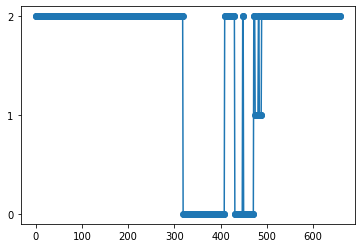

In [9]:
colors=[]
for r,g,b in zip(red,green,blue):
    c=closest_color_as_number(r,g,b,
                           [0,0,0],
                           [255,255,255],
                           [50,90,20])
    colors.append(c)

colors=array(colors)
plot(colors,'o-')
gca().set_yticks([0,1,2])

In [10]:
where(colors==0)[0][0]

319

In [17]:
def closest_color_as_number(r,g,b,*args):

    min_distance_sq=0
    min_color=None
    for c,color in enumerate(args):
        r2,g2,b2=color
        distance_sq=(r-r2)**2+(g-g2)**2+(b-b2)**2

        if min_color is None:  # first color
            min_color=c
            min_distance_sq=distance_sq
        elif distance_sq<min_distance_sq:
            min_color=c
            min_distance_sq=distance_sq
        else:
            pass

    return min_color

def closest_color_image(arr,*args):
    arr2=ones(arr.shape[:2])
    R,G,B=arr[:,:,0],arr[:,:,1],arr[:,:,2]
    L=len(arr[:,:,0].ravel())
    R=R.ravel()
    B=B.ravel()
    G=G.ravel()
    
    for i in range(L):
        r,g,b=R[i],G[i],B[i]
        c=closest_color_as_number(r,g,b,*args)
        arr2.ravel()[i]=c
        
    return arr2

In [18]:
colors={0:'black',1:'white',2:'brown'}
num=closest_color_as_number(30,150,60,
                       [0,0,0],
                       [255,255,255],
                       [50,90,20])
print(num,colors[num])

2 brown


In [21]:
arr2=closest_color_image(arr,
                   [50,100,150],
                   [20,20,20],
                   [150,200,175])

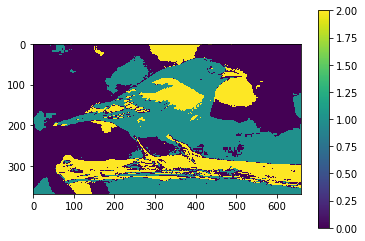

In [23]:
imshow(arr2)
colorbar()

In [4]:
nrows,ncols=arr.shape[0],arr.shape[1]

In [5]:
nrows,ncols

(371, 660)

In [6]:
start_col=ncols//4
end_col=2*ncols//4
part=arr[:,start_col:end_col,:]

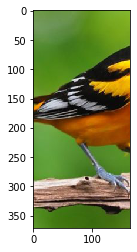

In [7]:
imshow(part)

In [8]:
355/4

88.75

In [9]:
355//4

88

In [10]:
start_col=2*ncols//4
end_col=3*ncols//4
part=arr[:,start_col:end_col,:]

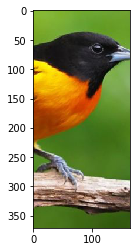

In [11]:
imshow(part)

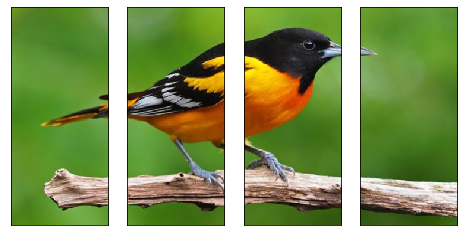

In [15]:
figure(figsize=(8,16))
for p in range(4):
    start_col=p*ncols//4
    end_col=(p+1)*ncols//4
    part=arr[:,start_col:end_col,:]
    
    subplot(1,4,p+1)
    imshow(part)
    
    gca().set_xticks([])
    gca().set_yticks([])
